In [24]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
X_train = np.load('hw2_fashionmnist/train.npy')
X_train = X_train.reshape((len(X_train), -1))

X_test = np.load('hw2_fashionmnist/test.npy')
X_test = X_test.reshape((len(X_test), -1))

y_train = np.load('hw2_fashionmnist/trainlabels.npy')
y_test = np.load('hw2_fashionmnist/testlabels.npy')

In [38]:
X_test.shape

(10000, 784)

In [41]:
def show_img_from_class(images, labels, cls):
    class_imgs = images[labels == cls]
    random.shuffle(class_imgs)

    for img in class_imgs[:5]:
        plt.figure()
        plt.imshow(img.reshape((28, 28)), cmap='gray')

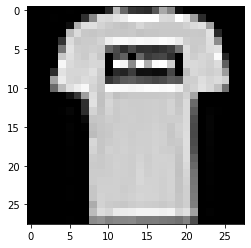

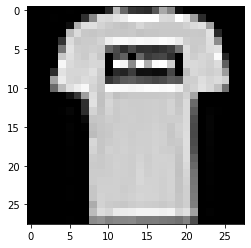

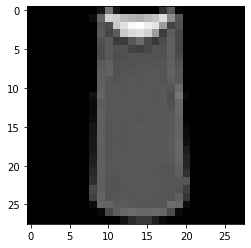

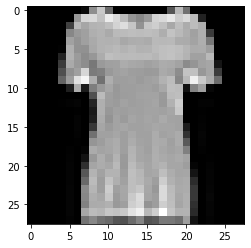

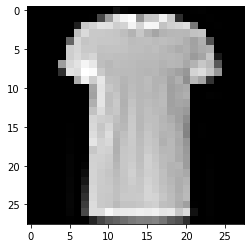

In [42]:
show_img_from_class(X_train, y_train, 0)

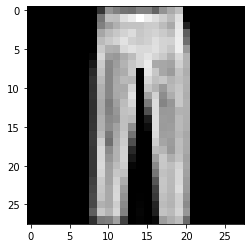

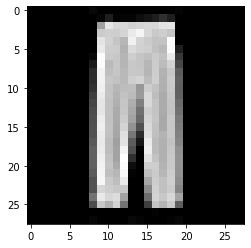

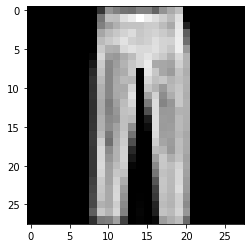

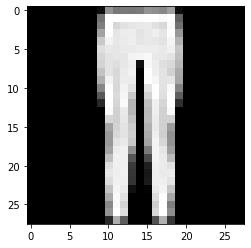

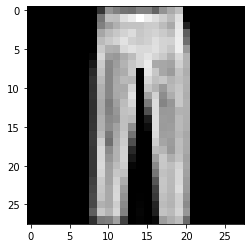

In [30]:
show_img_from_class(X_train, y_train, 1)

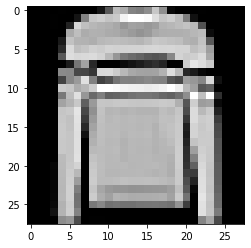

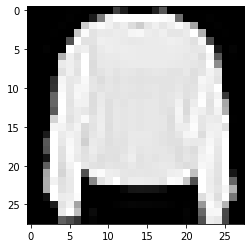

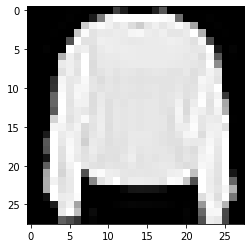

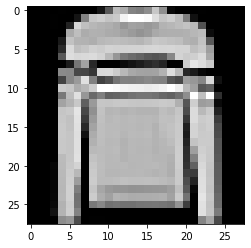

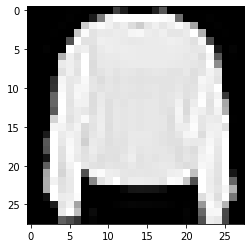

In [31]:
show_img_from_class(X_train, y_train, 2)

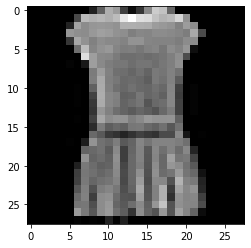

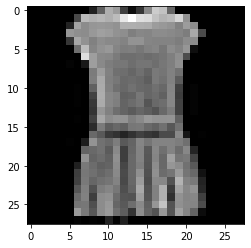

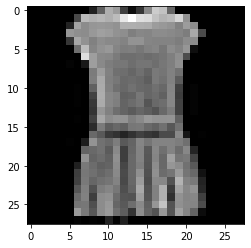

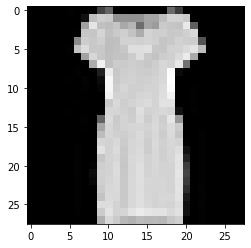

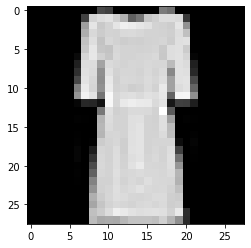

In [32]:
show_img_from_class(X_train, y_train, 3)

In [60]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

max_leaves = []
for i in range(10, 10000, 500):
    dt_clf = DecisionTreeClassifier(random_state=0, max_leaf_nodes=i)
    dt_clf.fit(X_train, y_train)

    y_pred_train = dt_clf.predict(X_train)
    y_pred_test = dt_clf.predict(X_test)

    test_loss = np.count_nonzero(y_pred_test != y_test)
    train_loss = np.count_nonzero(y_pred_train != y_train)

    #dec_tree_accuracy = accuracy_score(y_test, y_pred)
    print("0-1 Test Loss: {}, 0-1 Train Loss: {}, max_leaf_nodes: {}, max_leaf_node_used: {}".format(test_loss, train_loss, i, dt_clf.get_n_leaves()))
    max_leaves.append((test_loss, train_loss, i, dt_clf.get_n_leaves()))


0-1 Test Loss: 3433, 0-1 Train Loss: 19856, max_leaf_nodes: 10, max_leaf_node_used: 10
0-1 Test Loss: 1875, 0-1 Train Loss: 7629, max_leaf_nodes: 510, max_leaf_node_used: 510
0-1 Test Loss: 1843, 0-1 Train Loss: 5449, max_leaf_nodes: 1010, max_leaf_node_used: 1010
0-1 Test Loss: 1868, 0-1 Train Loss: 3982, max_leaf_nodes: 1510, max_leaf_node_used: 1510
0-1 Test Loss: 1900, 0-1 Train Loss: 2960, max_leaf_nodes: 2010, max_leaf_node_used: 2010
0-1 Test Loss: 1948, 0-1 Train Loss: 2256, max_leaf_nodes: 2510, max_leaf_node_used: 2510
0-1 Test Loss: 1988, 0-1 Train Loss: 1727, max_leaf_nodes: 3010, max_leaf_node_used: 3010
0-1 Test Loss: 2027, 0-1 Train Loss: 1198, max_leaf_nodes: 3510, max_leaf_node_used: 3510
0-1 Test Loss: 2040, 0-1 Train Loss: 685, max_leaf_nodes: 4010, max_leaf_node_used: 4010
0-1 Test Loss: 2051, 0-1 Train Loss: 256, max_leaf_nodes: 4510, max_leaf_node_used: 4510
0-1 Test Loss: 2084, 0-1 Train Loss: 0, max_leaf_nodes: 5010, max_leaf_node_used: 4905
0-1 Test Loss: 2084,

Text(0.5, 1.0, 'Max Leaves vs 0-1 Loss for Decision Tree Classifier')

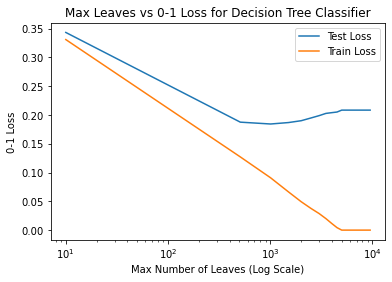

In [88]:
max_leaves_np = np.array(max_leaves)
plt.plot(max_leaves_np[:, 2], max_leaves_np[:, 0] / len(y_test), label="Test Loss")
plt.plot(max_leaves_np[:, 2], max_leaves_np[:, 1] / len(y_train), label="Train Loss")

plt.legend()
plt.xlabel("Max Number of Leaves (Log Scale)")
plt.ylabel("0-1 Loss")
plt.xscale("log")

plt.title("Max Leaves vs 0-1 Loss for Decision Tree Classifier")

In [63]:
from sklearn.ensemble import RandomForestClassifier

max_leaves_rf_1 = []
for i in range(10, 5500, 500):
    rf_clf = RandomForestClassifier(random_state=0, max_leaf_nodes=i)
    rf_clf.fit(X_train, y_train)

    y_pred_train = rf_clf.predict(X_train)
    y_pred_test = rf_clf.predict(X_test)

    test_loss = np.count_nonzero(y_pred_test != y_test)
    train_loss = np.count_nonzero(y_pred_train != y_train)

    # Calculate the total number of parameters in the random forest classifier
    total_params = i * len(rf_clf.estimators_)

    print("Test Loss: {}, Train Loss: {}, max_leaf_nodes: {}, total_params: {}".format(test_loss, train_loss, i, total_params))
    max_leaves_rf_1.append((test_loss, train_loss, i, total_params))

Test Loss: 2690, Train Loss: 15484, max_leaf_nodes: 10, total_params: 1000
Test Loss: 1416, Train Loss: 6105, max_leaf_nodes: 510, total_params: 51000
Test Loss: 1358, Train Loss: 4085, max_leaf_nodes: 1010, total_params: 101000
Test Loss: 1318, Train Loss: 2701, max_leaf_nodes: 1510, total_params: 151000
Test Loss: 1299, Train Loss: 1745, max_leaf_nodes: 2010, total_params: 201000
Test Loss: 1296, Train Loss: 1148, max_leaf_nodes: 2510, total_params: 251000
Test Loss: 1281, Train Loss: 743, max_leaf_nodes: 3010, total_params: 301000
Test Loss: 1273, Train Loss: 538, max_leaf_nodes: 3510, total_params: 351000
Test Loss: 1262, Train Loss: 388, max_leaf_nodes: 4010, total_params: 401000
Test Loss: 1250, Train Loss: 196, max_leaf_nodes: 4510, total_params: 451000
Test Loss: 1239, Train Loss: 0, max_leaf_nodes: 5010, total_params: 501000
Test Loss: 1239, Train Loss: 0, max_leaf_nodes: 5510, total_params: 551000
Test Loss: 1239, Train Loss: 0, max_leaf_nodes: 6010, total_params: 601000
Test

Text(0.5, 1.0, 'Total Params vs 0-1 Loss for Random Forest Classifier')

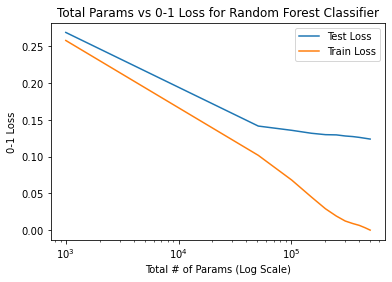

In [95]:
max_leaves_rf_1 = np.array(max_leaves_rf_1)
plt.plot(max_leaves_rf_1[:, 2], max_leaves_rf_1[:, 0] / len(y_test), label="Test Loss")
plt.plot(max_leaves_rf_1[:, 2], max_leaves_rf_1[:, 1] / len(y_train), label="Train Loss")

plt.legend()
plt.xlabel("Total # of Params (Log Scale)")
plt.ylabel("0-1 Loss")
plt.xscale("log")

plt.title("Total Params vs 0-1 Loss for Random Forest Classifier")

In [91]:
max_leaves_rf = []
for i in range(1, 700, 50):
    rf_clf = RandomForestClassifier(random_state=0, n_estimators=i, max_leaf_nodes=200)
    rf_clf.fit(X_train, y_train)

    y_pred_train = rf_clf.predict(X_train)
    y_pred_test = rf_clf.predict(X_test)

    test_loss = np.count_nonzero(y_pred_test != y_test)
    train_loss = np.count_nonzero(y_pred_train != y_train)

    # Calculate the total number of parameters in the random forest classifier
    total_params = 200 * len(rf_clf.estimators_)

    print("Test Loss: {}, Train Loss: {}, n_estimators: {}, total_params: {}".format(test_loss, train_loss, i, total_params))
    max_leaves_rf.append((test_loss, train_loss, i, total_params))

Test Loss: 2211, Train Loss: 12135, n_estimators: 1, total_params: 200
Test Loss: 1588, Train Loss: 8186, n_estimators: 51, total_params: 10200
Test Loss: 1603, Train Loss: 8119, n_estimators: 101, total_params: 20200
Test Loss: 1608, Train Loss: 8136, n_estimators: 151, total_params: 30200
Test Loss: 1594, Train Loss: 8086, n_estimators: 201, total_params: 40200
Test Loss: 1586, Train Loss: 8092, n_estimators: 251, total_params: 50200
Test Loss: 1590, Train Loss: 8085, n_estimators: 301, total_params: 60200
Test Loss: 1588, Train Loss: 8101, n_estimators: 351, total_params: 70200
Test Loss: 1585, Train Loss: 8083, n_estimators: 401, total_params: 80200
Test Loss: 1581, Train Loss: 8079, n_estimators: 451, total_params: 90200
Test Loss: 1585, Train Loss: 8077, n_estimators: 501, total_params: 100200
Test Loss: 1583, Train Loss: 8077, n_estimators: 551, total_params: 110200
Test Loss: 1584, Train Loss: 8078, n_estimators: 601, total_params: 120200
Test Loss: 1585, Train Loss: 8080, n_es

Text(0.5, 1.0, 'Total Params vs 0-1 Loss for Random Forest Classifier')

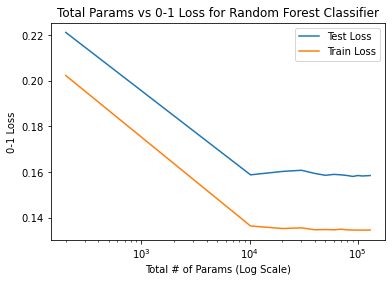

In [93]:
max_leaves_rf = np.array(max_leaves_rf)
plt.plot(max_leaves_rf[:, 3], max_leaves_rf[:, 0] / len(y_test), label="Test Loss")
plt.plot(max_leaves_rf[:, 3], max_leaves_rf[:, 1] / len(y_train), label="Train Loss")

plt.legend()
plt.xlabel("Total # of Params (Log Scale)")
plt.ylabel("0-1 Loss")
plt.xscale("log")

plt.title("Total Params vs 0-1 Loss for Random Forest Classifier")

In [69]:
rf_grow_estimators = []
n_estimators = 2
while n_estimators <= 1024: 
    rf_clf = RandomForestClassifier(random_state=0, n_estimators=n_estimators, max_leaf_nodes=4905)
    rf_clf.fit(X_train, y_train)

    y_pred_train = rf_clf.predict(X_train)
    y_pred_test = rf_clf.predict(X_test)

    test_loss = np.count_nonzero(y_pred_test != y_test)
    train_loss = np.count_nonzero(y_pred_train != y_train)

    # Calculate the total number of parameters in the random forest classifier
    total_params = 4905 * len(rf_clf.estimators_)

    print("Test Loss: {}, Train Loss: {}, max_leaf_nodes: {}, n_estimators: {}, total_params: {}".format(test_loss, train_loss, 4905, n_estimators, total_params))
    rf_grow_estimators.append((test_loss, train_loss, i, n_estimators, total_params))

    n_estimators *= 2

Test Loss: 2410, Train Loss: 5117, max_leaf_nodes: 4905, n_estimators: 2, total_params: 9810
Test Loss: 1774, Train Loss: 1548, max_leaf_nodes: 4905, n_estimators: 4, total_params: 19620
Test Loss: 1519, Train Loss: 418, max_leaf_nodes: 4905, n_estimators: 8, total_params: 39240
Test Loss: 1365, Train Loss: 89, max_leaf_nodes: 4905, n_estimators: 16, total_params: 78480
Test Loss: 1308, Train Loss: 24, max_leaf_nodes: 4905, n_estimators: 32, total_params: 156960
Test Loss: 1255, Train Loss: 16, max_leaf_nodes: 4905, n_estimators: 64, total_params: 313920
Test Loss: 1226, Train Loss: 14, max_leaf_nodes: 4905, n_estimators: 128, total_params: 627840
Test Loss: 1220, Train Loss: 13, max_leaf_nodes: 4905, n_estimators: 256, total_params: 1255680
Test Loss: 1216, Train Loss: 13, max_leaf_nodes: 4905, n_estimators: 512, total_params: 2511360
Test Loss: 1219, Train Loss: 11, max_leaf_nodes: 4905, n_estimators: 1024, total_params: 5022720


Text(0.5, 1.0, 'Total Params vs 0-1 Loss for Random Forest Classifier')

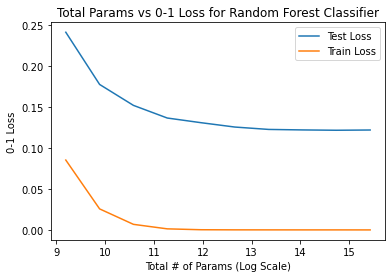

In [71]:
rf_grow_estimators = np.array(rf_grow_estimators)
plt.plot(np.log(rf_grow_estimators[:, 4]), rf_grow_estimators[:, 0] / len(y_test), label="Test Loss")
plt.plot(np.log(rf_grow_estimators[:, 4]), rf_grow_estimators[:, 1] / len(y_train), label="Train Loss")

plt.legend()
plt.xlabel("Total # of Params (Log Scale)")
plt.ylabel("0-1 Loss")
plt.title("Total Params vs 0-1 Loss for Random Forest Classifier")

In [82]:
full_rf_grow = np.vstack((max_leaves_np, rf_grow_estimators[:, [0,1,2,4]]))

Text(0.5, 1.0, 'Total Params vs 0-1 Loss for Random Forest Classifier')

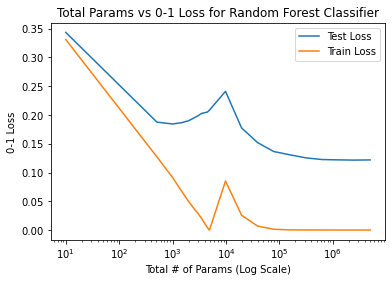

In [86]:
#plt.plot(max_leaves_np[:, 3], max_leaves_np[:, 0] / len(y_test), label="Test Loss (Phase 1)")
#plt.plot(max_leaves_np[:, 3], max_leaves_np[:, 1] / len(y_train), label="Train Loss (Phase 1)")

#plt.plot(rf_grow_estimators[:, 4], rf_grow_estimators[:, 0] / len(y_test), label="Test Loss (Phase 2)")
#plt.plot(rf_grow_estimators[:, 4], rf_grow_estimators[:, 1] / len(y_train), label="Train Loss (Phase 2)")

plt.plot(full_rf_grow[:, 3], full_rf_grow[:, 0] / len(y_test), label="Test Loss")
plt.plot(full_rf_grow[:, 3], full_rf_grow[:, 1] / len(y_train), label="Train Loss")

plt.legend()
plt.xlabel("Total # of Params (Log Scale)")
plt.ylabel("0-1 Loss")
plt.xscale("log")

plt.title("Total Params vs 0-1 Loss for Random Forest Classifier")

In [101]:
def double_descent():
    double_descent = []

    phase_1 = []
    num_leaves = 10
    while num_leaves <= 5100:
        rf_clf = RandomForestClassifier(random_state=0, n_estimators=1, max_leaf_nodes=num_leaves)
        rf_clf.fit(X_train, y_train)

        y_pred_train = rf_clf.predict(X_train)
        y_pred_test = rf_clf.predict(X_test)

        test_loss = np.count_nonzero(y_pred_test != y_test)
        train_loss = np.count_nonzero(y_pred_train != y_train)

        # Calculate the total number of parameters in the random forest classifier
        total_params = num_leaves * len(rf_clf.estimators_)

        print("Test Loss: {}, Train Loss: {}, max_leaf_nodes: {}, total_params: {}".format(test_loss, train_loss, num_leaves, total_params))
        phase_1.append((test_loss, train_loss, num_leaves, total_params))

        num_leaves += 500

    phase_2 = []
    n_estimators = 2
    while n_estimators <= 128: 
        rf_clf = RandomForestClassifier(random_state=0, n_estimators=n_estimators, max_leaf_nodes=num_leaves)
        rf_clf.fit(X_train, y_train)

        y_pred_train = rf_clf.predict(X_train)
        y_pred_test = rf_clf.predict(X_test)

        test_loss = np.count_nonzero(y_pred_test != y_test)
        train_loss = np.count_nonzero(y_pred_train != y_train)

        # Calculate the total number of parameters in the random forest classifier
        total_params = num_leaves * len(rf_clf.estimators_)

        print("Test Loss: {}, Train Loss: {}, max_leaf_nodes: {}, n_estimators: {}, total_params: {}".format(test_loss, train_loss, num_leaves, n_estimators, total_params))
        phase_2.append((test_loss, train_loss, n_estimators, total_params))

        n_estimators *= 2
    
    return phase_1, phase_2

In [102]:
phase_1, phase_2 = double_descent()

Test Loss: 4096, Train Loss: 24421, max_leaf_nodes: 10, total_params: 10
Test Loss: 2104, Train Loss: 10378, max_leaf_nodes: 510, total_params: 510
Test Loss: 2114, Train Loss: 9014, max_leaf_nodes: 1010, total_params: 1010
Test Loss: 2173, Train Loss: 8162, max_leaf_nodes: 1510, total_params: 1510
Test Loss: 2223, Train Loss: 7479, max_leaf_nodes: 2010, total_params: 2010
Test Loss: 2246, Train Loss: 6843, max_leaf_nodes: 2510, total_params: 2510
Test Loss: 2280, Train Loss: 6346, max_leaf_nodes: 3010, total_params: 3010
Test Loss: 2287, Train Loss: 5889, max_leaf_nodes: 3510, total_params: 3510
Test Loss: 2294, Train Loss: 5402, max_leaf_nodes: 4010, total_params: 4010
Test Loss: 2315, Train Loss: 5086, max_leaf_nodes: 4510, total_params: 4510
Test Loss: 2371, Train Loss: 4950, max_leaf_nodes: 5010, total_params: 5010
Test Loss: 2362, Train Loss: 4986, max_leaf_nodes: 5510, n_estimators: 2, total_params: 11020
Test Loss: 1766, Train Loss: 1564, max_leaf_nodes: 5510, n_estimators: 4, 

Text(0.5, 1.0, 'Total Params vs 0-1 Loss for Random Forest Classifier (Double Descent)')

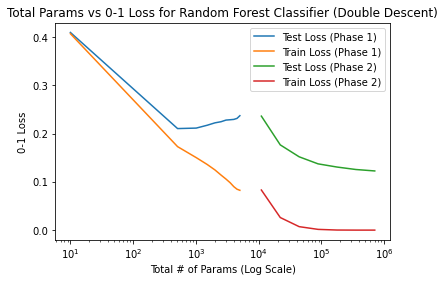

In [103]:
phase_1 = np.array(phase_1)
phase_2 = np.array(phase_2)

plt.plot(phase_1[:, 3], phase_1[:, 0] / len(y_test), label="Test Loss (Phase 1)")
plt.plot(phase_1[:, 3], phase_1[:, 1] / len(y_train), label="Train Loss (Phase 1)")

plt.plot(phase_2[:, 3], phase_2[:, 0] / len(y_test), label="Test Loss (Phase 2)")
plt.plot(phase_2[:, 3], phase_2[:, 1] / len(y_train), label="Train Loss (Phase 2)")

plt.legend()
plt.xlabel("Total # of Params (Log Scale)")
plt.ylabel("0-1 Loss")
plt.xscale("log")

plt.title("Total Params vs 0-1 Loss for Random Forest Classifier (Double Descent)")